# Comparison of image load function

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean

In [24]:
path_load = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small'
n_im = 0

Found 58 files belonging to 12 classes.


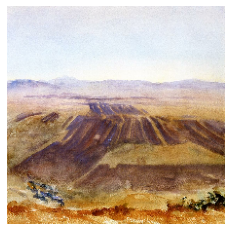

In [33]:
# image_dataset_from_drirectory
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

img_list = []
img_list_2 = []
for dir_path in os.listdir(path_load):
    img_list += os.listdir(os.path.join(path_load, dir_path))
    img_list_2 += [os.path.join(dir_path, s) for s in os.listdir(os.path.join(path_load, dir_path))]
    
test_dataset = image_dataset_from_directory(path_load, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='bilinear')
image_dfd = np.concatenate([im for im, lab in test_dataset])
image_dfd.shape
plt.imshow(np.uint(image_dfd[n_im,:]))
plt.axis('off');

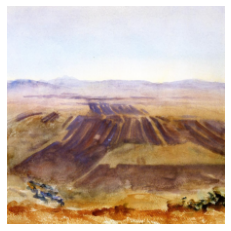

In [31]:
# load image
im_li = load_img(os.path.join(path_load, img_list_2[n_im]), grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
im_li = np.expand_dims(im_li,axis =0)
plt.imshow(im_li[0,:])
plt.axis('off');

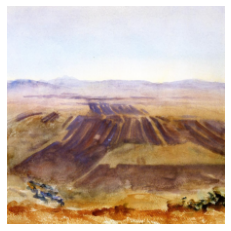

In [34]:
# PIL  PIL.Image.NEAREST, PIL.Image.BOX, PIL.Image.BILINEAR, PIL.Image.HAMMING, PIL.Image.BICUBIC or PIL.Image.LANCZOS
img_PIL = Image.open(os.path.join(path_load, img_list_2[n_im]))
img_PIL = img_PIL.resize((224,224),resample=Image.BILINEAR)
img_PIL = np.array(img_PIL)
img_PIL = np.expand_dims(img_PIL, axis = 0)
plt.imshow(img_PIL[0,:])
plt.axis('off');

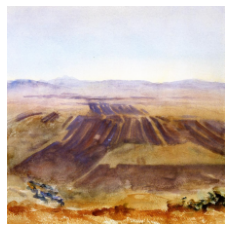

In [45]:
# Matplotlib
img_MPL = plt.imread(os.path.join(path_load, img_list_2[n_im]))
img_MPL = resize(img_MPL, (224, 224), anti_aliasing=True, )
img_MPL = np.expand_dims(img_MPL, axis = 0)
plt.imshow(img_MPL[0,:])
plt.axis('off');

In [46]:
print('load image')
print(f"Nb of different pixels: {np.sum(image_dfd[n_im,:]!=im_li[0:])}")
print(f"Distance: {np.sqrt(np.sum((image_dfd[n_im,:]-im_li[0:])**2)/im_li.size):.3f}")
print('PIL')
print(f"Nb of different pixels: {np.sum(image_dfd[n_im,:]!=img_PIL[0:])}")
print(f"Distance: {np.sqrt(np.sum((image_dfd[n_im,:]-img_PIL[0:])**2)/img_PIL.size):.3f}")
print('Matplotlibe')
print(f"Nb of different pixels: {np.sum(image_dfd[n_im,:]!=img_MPL[0,:])}")
print(f"Distance: {np.sqrt(np.sum((image_dfd[n_im,:]-img_MPL[0,:])**2)/img_MPL.size):.3f}")

load image
Nb of different pixels: 150271
Distance: 8.865
PIL
Nb of different pixels: 150271
Distance: 8.865
Matplotlibe
Nb of different pixels: 150522
Distance: 179.101


In [60]:
print('dataset from directory')
print(image_dfd[n_im,:5, :5, 1])
print('load image')
print(im_li[0,:5, :5, 1])
print('PIL')
print(img_PIL[0,:5, :5, 1])
print('Matplotlib')
print(255*img_MPL[0,:5, :5, 1])

dataset from directory
[[230.72992 234.26228 235.36383 234.17188 230.04352]
 [232.15959 227.11607 224.97098 232.1875  239.01451]
 [233.6942  233.77232 234.27344 227.02344 230.30469]
 [234.55914 230.86272 233.04576 231.10156 234.625  ]
 [230.73772 235.62053 236.66742 228.78906 241.84041]]
load image
[[231 233 234 232 231]
 [233 230 230 233 233]
 [233 231 232 233 231]
 [234 233 233 232 232]
 [234 235 234 233 233]]
PIL
[[231 233 234 232 231]
 [233 230 230 233 233]
 [233 231 232 233 231]
 [234 233 233 232 232]
 [234 235 234 233 233]]
Matplotlib
[[229.80915179 231.74888393 232.79352679 231.3984375  230.6875    ]
 [231.95424107 229.25892857 228.40178571 232.8203125  231.9375    ]
 [231.4375     230.11049107 231.19084821 231.5078125  229.4375    ]
 [232.86272321 232.03683036 231.53683036 231.         231.        ]
 [232.26785714 234.66183036 233.         231.8359375  232.        ]]


In [61]:
li_met = ["nearest", "bilinear", "bicubic", "lanczos", "box", "hamming"]
def image_li_diff(n_im, met):
    im_li = load_img(os.path.join(path_load, img_list_2[n_im]), grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation=met)
    im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
    im_li = np.expand_dims(im_li,axis =0)
    return np.sqrt(np.sum((image_dfd[n_im,:]-im_li[0:])**2)/im_li.size)

In [66]:
PIL_met = [Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS]
def image_PIL_diff(n_im, met):
    img_PIL = Image.open(os.path.join(path_load, img_list_2[n_im]))
    img_PIL = img_PIL.resize((224,224),resample=met)
    img_PIL = np.array(img_PIL)
    img_PIL = np.expand_dims(img_PIL, axis = 0)
    return np.sqrt(np.sum((image_dfd[n_im,:]-img_PIL[0:])**2)/img_PIL.size)


In [73]:
def image_MPL_diff(n_im):
    img_MPL = plt.imread(os.path.join(path_load, img_list_2[n_im]))
    img_MPL = 255*resize(img_MPL, (224, 224), anti_aliasing=True, )
    img_MPL = np.expand_dims(img_MPL, axis = 0)
    return np.sqrt(np.sum((image_dfd[n_im,:]-img_MPL[0:])**2)/img_MPL.size)

In [74]:
for n_im in range(len(image_dfd)):
    im_dist = []
    for met in li_met:
        im_dist.append(image_li_diff(n_im, met))
    for met in PIL_met:
        im_dist.append(image_PIL_diff(n_im, met))
    im_dist.append(image_MPL_diff(n_im))
    im_dist

[5.243101989089757,
 8.86457926437189,
 8.514446471699863,
 8.611335407866543,
 8.206746090595512,
 7.746916224918838,
 5.243101955670853,
 8.206745941203028,
 8.86457908662776,
 7.746916046210957,
 8.514446241670441,
 8.611335208251827,
 8.487328107168622]

In [76]:
from tensorflow.python.ops import image_ops
from tensorflow.python.ops import io_ops

In [77]:
def path_to_image(path, image_size, num_channels, interpolation):
    img = io_ops.read_file(path)
    img = image_ops.decode_image(
      img, channels=num_channels, expand_animations=False)
    img = image_ops.resize_images_v2(img, image_size, method=interpolation)
    img.set_shape((image_size[0], image_size[1], num_channels))
    return img

In [87]:
img_2 = path_to_image(os.path.join(path_load, img_list_2[n_im]), (224, 224), 3, 'bilinear')
img_2 = np.array(img_2)

In [88]:
np.sqrt(np.sum((image_dfd[n_im,:]-img_2)**2)/img_2.size)

0.0

In [80]:
img_2.shape

TensorShape([224, 224, 3])

In [98]:
path_test = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Train\_7\313.jpg'
img_test = path_to_image(path_test, (224, 224), 3, 'bilinear')
img_test = np.array(img_test)
img_test = np.expand_dims(img_test, axis = 0)

In [99]:
model.predict(img_test)

array([[0.11162178, 0.02303473, 0.00748918, 0.076305  , 0.09559032,
        0.03525717, 0.17840677, 0.10322683, 0.07251915, 0.2385361 ,
        0.04525965, 0.01275332]], dtype=float32)

In [102]:
for i in range(len(image_dfd)):
    img_test = path_to_image(os.path.join(path_load, img_list_2[i]), (224, 224), 3, 'bilinear')
    img_test = np.array(img_test)
    print(np.sqrt(np.sum((image_dfd[i,:]-img_test)**2)/img_test.size))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
